<a href="https://colab.research.google.com/github/bigDataNCloud/mgmt_467_resources/blob/main/Unit1_Labs/Lab_3_Data_Visualization_Dashboarding/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

Exploratory vs. Explanatory Visualization

EXPLORATORY

Purpose: Used during analysis to find patterns, outliers, relationships.

Audience: Yourself or your analysis team.

Characteristics: Quick, iterative, often messy; focus on discovery, not polish.

Example: Scatterplot matrix while exploring correlations in raw data.

EXPLANATORY

Purpose: Used to communicate insights after analysis is complete.

Audience: Stakeholders, executives, clients.

Characteristics: Polished, clear, minimal clutter; emphasizes key takeaways.

Example: Single clean chart in a slide deck highlighting revenue growth.

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

Bar:

Question archetype: Compare categories (“Which product sold most?”).

Data shape: Categorical → numeric.

Pitfalls: Too many bars clutter; scale manipulation can mislead; categories without natural order may confuse.

Alternatives: Dot plots, stacked bars, treemaps.

Line:

Question archetype: Trends over time (“How did sales change month to month?”).

Data shape: Time series (numeric over ordered interval).

Pitfalls: Irregular time intervals distort trends; too many series cause spaghetti plots.

Alternatives: Area charts, sparklines, slope charts.

Scatter:

Question archetype: Relationship between two variables (“Is there a correlation between price and demand?”).

Data shape: Two numeric variables (optionally add size/color for more dimensions).

Pitfalls: Overplotting hides density; correlation ≠ causation; scaling issues.

Alternatives: Bubble plots, heatmaps, hexbin plots.

Histogram:

Question archetype: Distribution (“What’s the spread of customer ages?”).

Data shape: Single numeric variable binned into ranges.

Pitfalls: Bin size selection heavily affects shape; comparing multiple groups can be hard.

Alternatives: Density plots, box plots, violin plots.

Map:

Question archetype: Spatial distribution (“Where are sales strongest geographically?”).

Data shape: Geographic (region/coordinate) + numeric/categorical attribute.

Pitfalls: Area size can bias perception; color scales can mislead; sparse data overemphasized.

Alternatives: Cartograms, proportional symbol maps, tables with sparklines.

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
ChatGPT said:

KPI 1: On-Time Rate

Why it matters: Core reliability measure; directly impacts customer satisfaction and operational efficiency.

Best chart: Line chart (trend over months) with benchmark line at industry average.

Drill-down fields: By route, airport, time of day, aircraft type.

KPI 2: Average Delay Minutes

Why it matters: Complements on-time rate; shows how severe delays are when they happen.

Best chart: Box plot (distribution of delay minutes by route/airport) or bar chart (average delay by cause: weather, crew, maintenance).

Drill-down fields: Delay cause, route, day of week, seasonality.

KPI 3: Load Factor (Passengers ÷ Available Seats)

Why it matters: Indicates efficiency of seat utilization and demand alignment.

Best chart: Bar chart (by route/region) + line chart (trend over time).

Drill-down fields: By aircraft type, route, season, cabin class.

KPI 4: Yield (Revenue per Passenger Mile)

Why it matters: Shows profitability per passenger; critical for financial health.

Best chart: Line chart (trend over time) with region-level breakdown in a small multiple view.

Drill-down fields: By route, class of service (economy vs. business), season.

KPI 5: Cancellation Rate

Why it matters: Directly affects customer trust and operational costs; regulators monitor this.

Best chart: Column chart (cancellation % by airport/route) with color-coded thresholds.

Drill-down fields: By cause (maintenance, crew, weather), aircraft type, region.


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-1606704232.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')


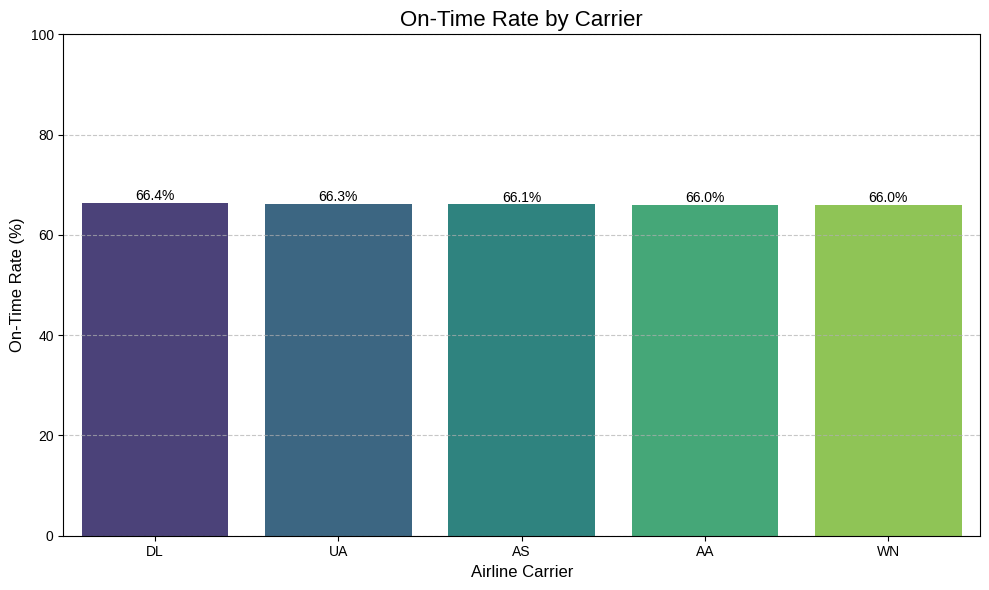

In [ ]:
# Prompt A -

# Calculate on-time rate by carrier
on_time_rate_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')

# Add percentage labels on top of each bar
for index, value in enumerate(on_time_rate_by_carrier.values):
    plt.text(index, value + 0.5, f'{value:.1f}%', color='black', ha="center")

# Add labels and title
plt.title('On-Time Rate by Carrier', fontsize=16)
plt.xlabel('Airline Carrier', fontsize=12)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.ylim(0, 100) # Ensure y-axis goes up to 100%

# Use a clean style and tight layout
plt.style.use('seaborn-v0_8-whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# To see the output, run the code.
plt.show()


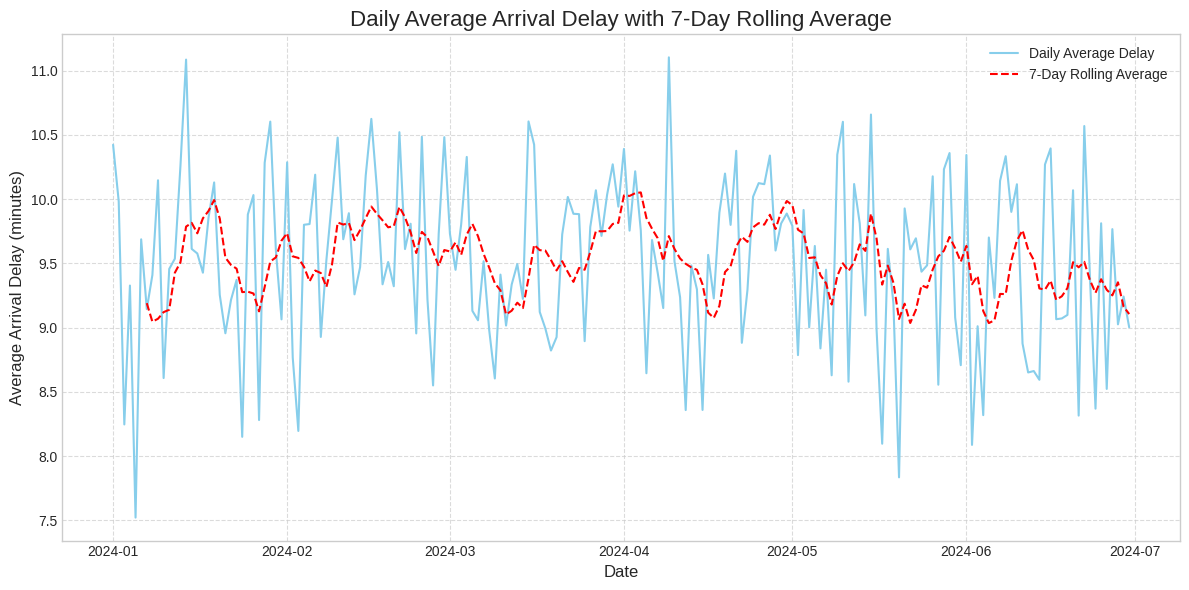

In [ ]:
#Prompt B:

# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean().reset_index()
daily_avg_delay.set_index('date', inplace=True)

# Calculate the 7-day rolling average
daily_avg_delay['rolling_avg_delay'] = daily_avg_delay['arr_delay_min'].rolling(window=7).mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_delay, x=daily_avg_delay.index, y='arr_delay_min', label='Daily Average Delay', color='skyblue')
sns.lineplot(data=daily_avg_delay, x=daily_avg_delay.index, y='rolling_avg_delay', label='7-Day Rolling Average', color='red', linestyle='--')

# Add axis labels, title, and grid
plt.title('Daily Average Arrival Delay with 7-Day Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# To see the output, run the code.
plt.show()

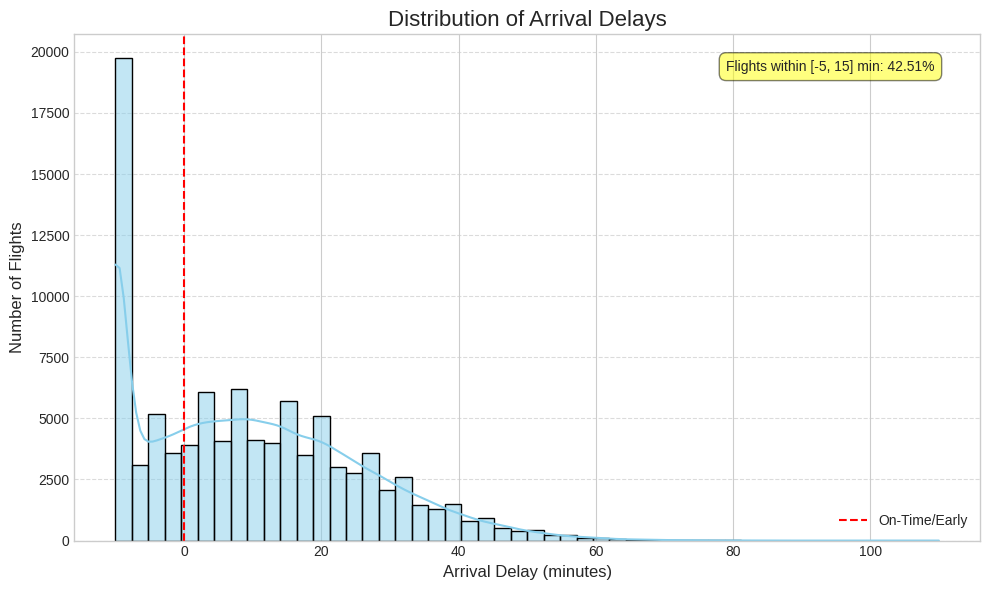

In [ ]:
#Prompt C:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=True, color='skyblue')

# 2. Add a vertical reference line at 0
plt.axvline(0, color='red', linestyle='--', label='On-Time/Early')

# 3. Calculate the percentage of flights within [-5, 15] minutes
flights_in_range = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
percent_in_range = (len(flights_in_range) / len(df_flights)) * 100

# 4. Annotate the percentage on the plot
plt.text(0.95, 0.95, f'Flights within [-5, 15] min: {percent_in_range:.2f}%',
         transform=plt.gca().transAxes, ha='right', va='top',
         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Add labels and title
plt.title('Distribution of Arrival Delays', fontsize=16)
plt.xlabel('Arrival Delay (minutes)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# To see the output, run the code.
plt.show()



/tmp/ipython-input-1390505062.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='load_factor', y='route', data=top_15_routes, palette='viridis')
/tmp/ipython-input-1390505062.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


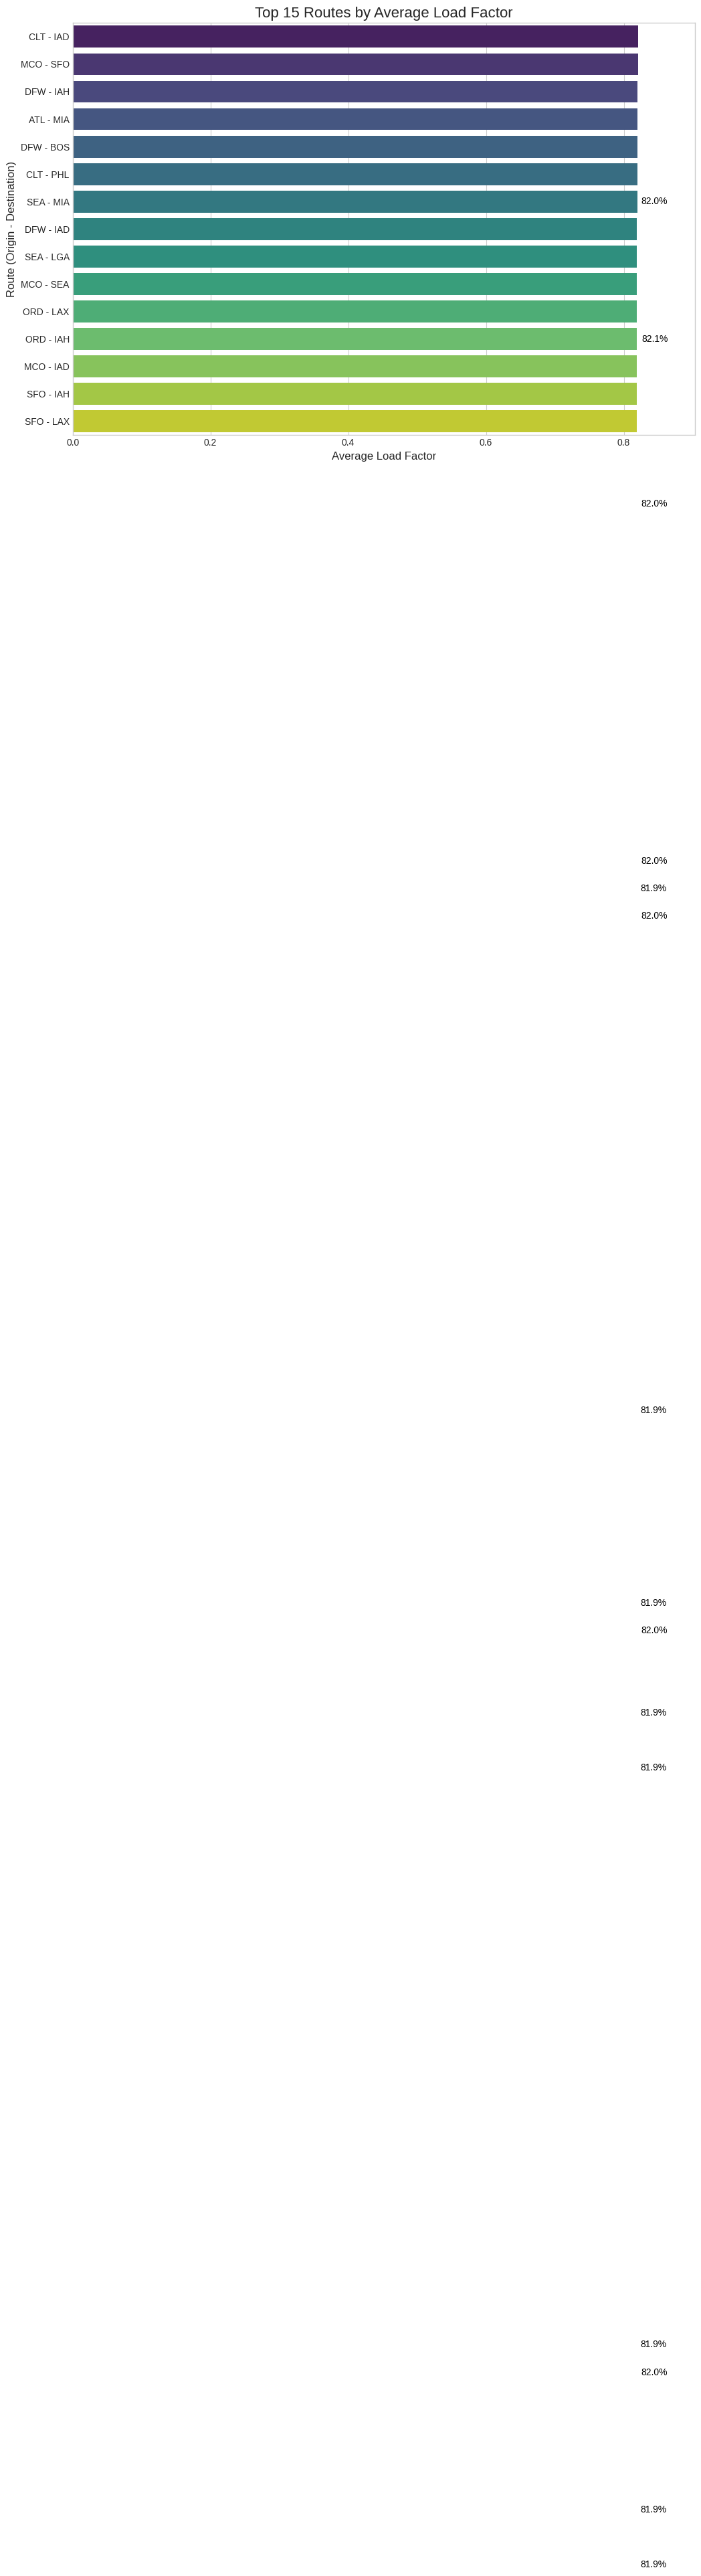

In [ ]:
#Prompt D:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Create a 'route' column by combining origin and destination
df_flights['route'] = df_flights['origin'] + ' - ' + df_flights['dest']

# 2. Compute mean load factor by route
mean_load_factor_by_route = df_flights.groupby('route')['load_factor'].mean().reset_index()

# 3. Take the top 15 routes by average load factor
top_15_routes = mean_load_factor_by_route.sort_values(by='load_factor', ascending=False).head(15)

# 4. Plot a horizontal bar chart
plt.figure(figsize=(12, 8)) # Adjust figure size for better label readability
sns.barplot(x='load_factor', y='route', data=top_15_routes, palette='viridis')

# Add percentage labels to the bars
for index, row in top_15_routes.iterrows():
    plt.text(row['load_factor'] + 0.005, index, f'{row["load_factor"]:.1%}', va='center', color='black')

# Add labels and title
plt.title('Top 15 Routes by Average Load Factor', fontsize=16)
plt.xlabel('Average Load Factor', fontsize=12)
plt.ylabel('Route (Origin - Destination)', fontsize=12)
plt.xlim(0, top_15_routes['load_factor'].max() * 1.1) # Adjust x-axis limit for labels

# Ensure long labels are readable
plt.tight_layout()

# To see the output, run the code.
plt.show()


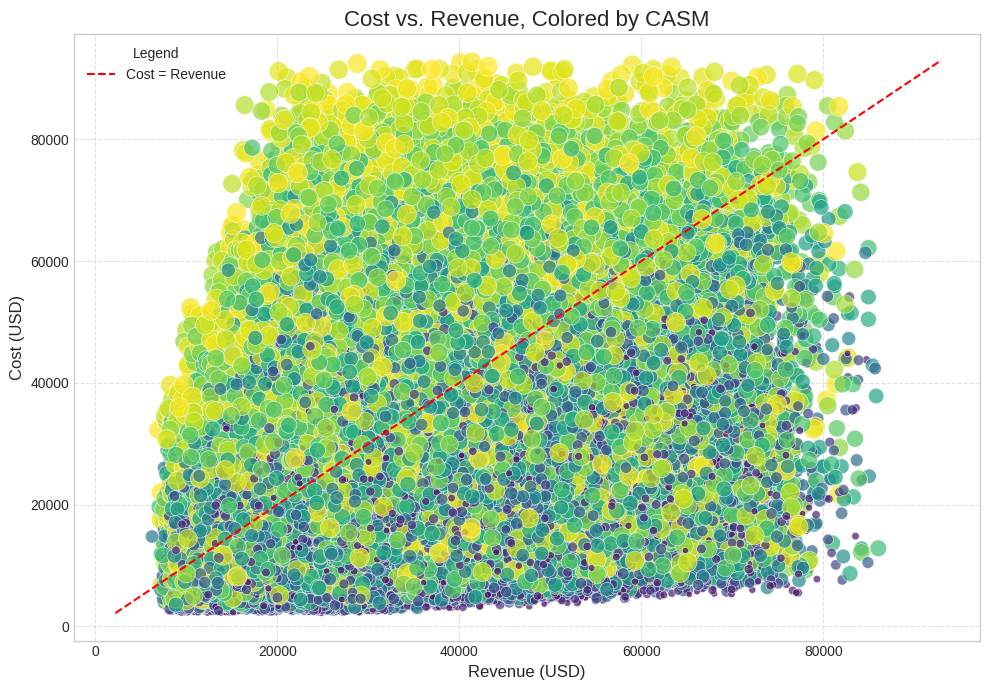

In [ ]:
#prompt e:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 7))

# Create the scatter plot with points colored by 'casm'
scatter = sns.scatterplot(
    data=df_flights,
    x='revenue_usd',
    y='cost_usd',
    hue='casm',
    palette='viridis', # A good continuous colormap
    size='casm',       # Optionally vary point size by casm for more emphasis
    sizes=(20, 200),   # Range of point sizes
    alpha=0.7
)

# Add a diagonal y=x reference line
# Find the min/max values for cost and revenue to set the line limits
min_val = min(df_flights['cost_usd'].min(), df_flights['revenue_usd'].min())
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Cost = Revenue')

# Include labels and title
plt.title('Cost vs. Revenue, Colored by CASM', fontsize=16)
plt.xlabel('Revenue (USD)', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)

# Add legend for the CASM color scale and the reference line
# Seaborn's scatterplot automatically creates a colorbar for 'hue'
# We need to manually add the legend for the 'Cost = Revenue' line
handles, labels = scatter.get_legend_handles_labels()
# Filter out the 'casm' legend entries if they are redundant with the colorbar
# and ensure the 'Cost = Revenue' line is included.
# The colorbar itself serves as the legend for 'casm'.
plt.legend(handles=[handles[-1]], labels=[labels[-1]], title='Legend') # Adjust if other legends appear

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# To see the output, run the code.
plt.show()


### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
-
-

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
